<a href="https://colab.research.google.com/github/MiteshBhula/AI-ML-Projects/blob/main/Mitesh_Bhula_NLP_Learner_Notebook_Full_code_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Twitter US Airline Sentiment

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [ ]:
# install and importing the necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS               # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer # Import count Vectorizer
from sklearn.model_selection import train_test_split    # Import train test split
from sklearn.ensemble import RandomForestClassifier     # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score     # Import cross val score
from sklearn.metrics import confusion_matrix            # Import confusion matrix
from wordcloud import WordCloud                         # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer # Import Tf-Idf vector
import nltk
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset only if you are using Google Colab


In [ ]:
# reading the data
data = pd.read_csv("Tweets.csv")

Reading the CSV file into a pandas dataframe

In [ ]:
# Creating a copy of the dataset
cdata = data.copy()

* Creating a copy of the dataset so any changes do not affect the original data.

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

In [ ]:
# Code to display the first 5 rows of the dataset
cdata.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Code to display the last 5 rows of the dataset
cdata.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
# Understanding the shape of the dataset
cdata.shape

(14640, 15)

* The dataset has 14 640 rows and 15 columns.  

In [ ]:
# Checking if there are any duplicate values within the dataset
cdata.duplicated().sum()

36

* There are 36 duplicate values within the dataset.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

- What is the percentage of tweets for each airline?
- What is the distribution of sentiments across all the tweets?
- What is the distribution of sentiments for each airline?
- What does the plot of negative reasons indicate?
- How does a wordcloud appear for negative tweets?
- How does a wordcloud appear for positive tweets?
- What are insights observed from EDA?

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

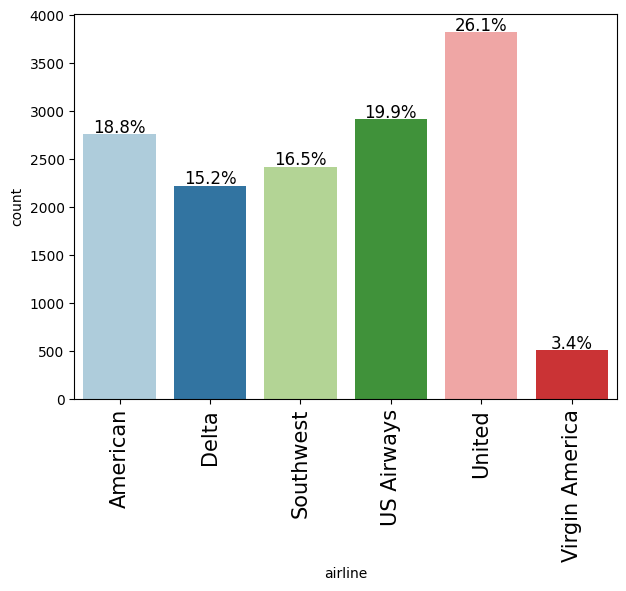

In [ ]:
# Percentage of tweets for each airline
labeled_barplot(cdata, "airline", perc=True)

* United airline has the highest percentage of tweets at 26.1%, while Virgin America has the lowest at 3.4%.

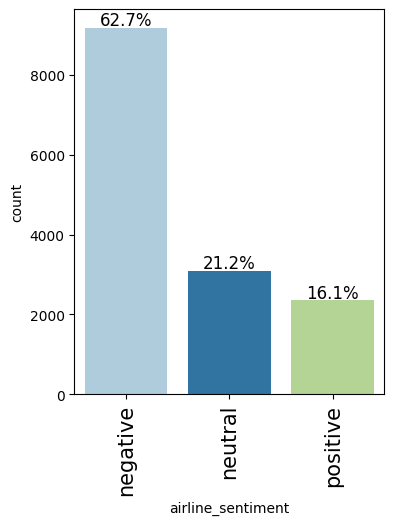

In [ ]:
# Distribution of sentiments across all tweets
labeled_barplot(cdata, "airline_sentiment", perc = True)

* 62.7% of all reviews posted on Twitter are of a negative sentiment.  

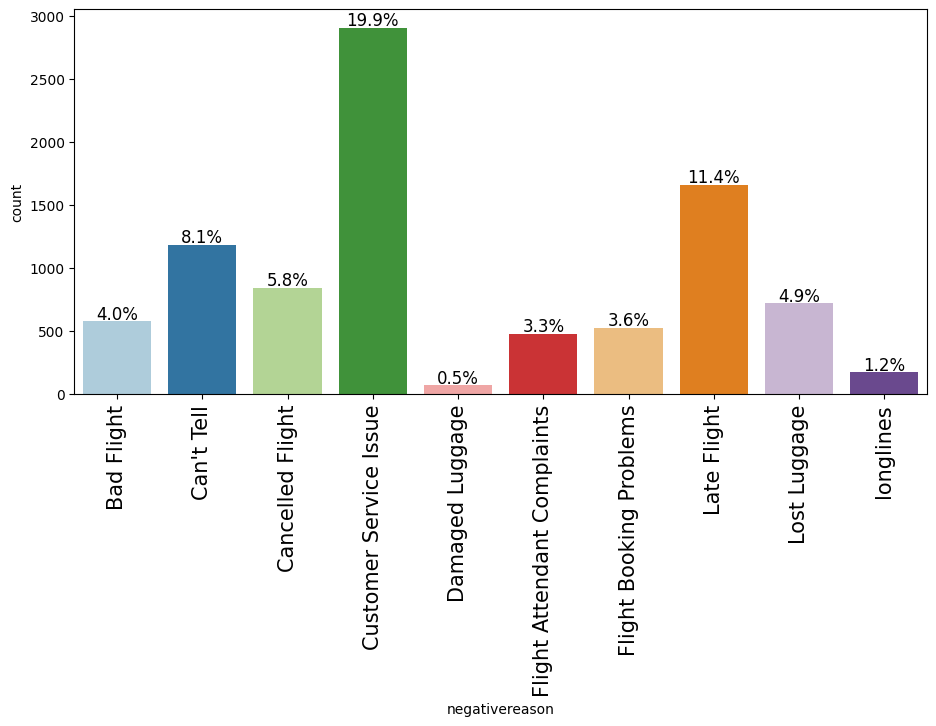

In [ ]:
# Plot of all negative reasons
labeled_barplot(cdata, "negativereason", perc = True)

* Around 20% of all negative sentiment reviews raise customer service as the main reason for a negative review.
* 11.4% of reviews relate to late flight.
* 0.5% relate to damaged luggage.

<Axes: xlabel='airline_sentiment'>

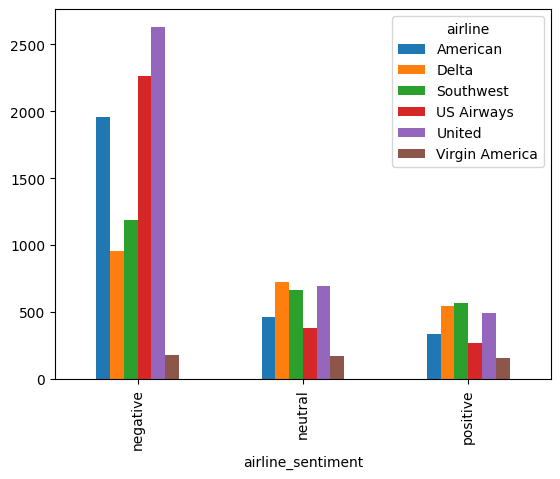

In [ ]:
# Sentiment of tweets for each airline
airline_sentiment = cdata.groupby(['airline_sentiment', 'airline']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind = 'bar')

* From the plot above, each airline has more negative reviews than neutral or positive.
* Virgin America is the only airline that has a similiar number of reviews across all 3 sentiments (negative, neutral and positive)

In [ ]:
# Creating a word cloud of negative words used tweets
airline_tweets = cdata[cdata['airline_sentiment'] == 'negative']
words = ' '.join(cdata['text'])
cleaned_word = " ".join([word for word in words.split()\
                         if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

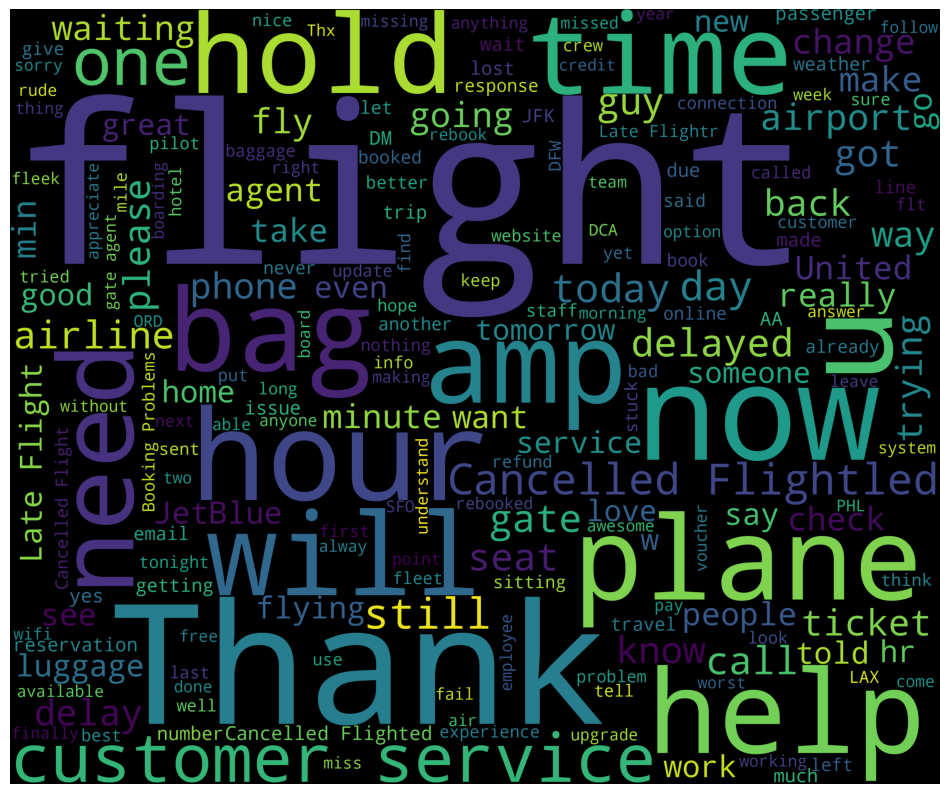

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* "Flight", "Help", "Thank" are the boldest words within this WordCloud but do not directly point to a negative sentiment.  

In [ ]:
# Creating a word cloud of positive words used tweets
airline_tweets = cdata[cdata['airline_sentiment'] == 'positive']
words = ' '.join(cdata['text'])
cleaned_word = " ".join([word for word in words.split()\
                         if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

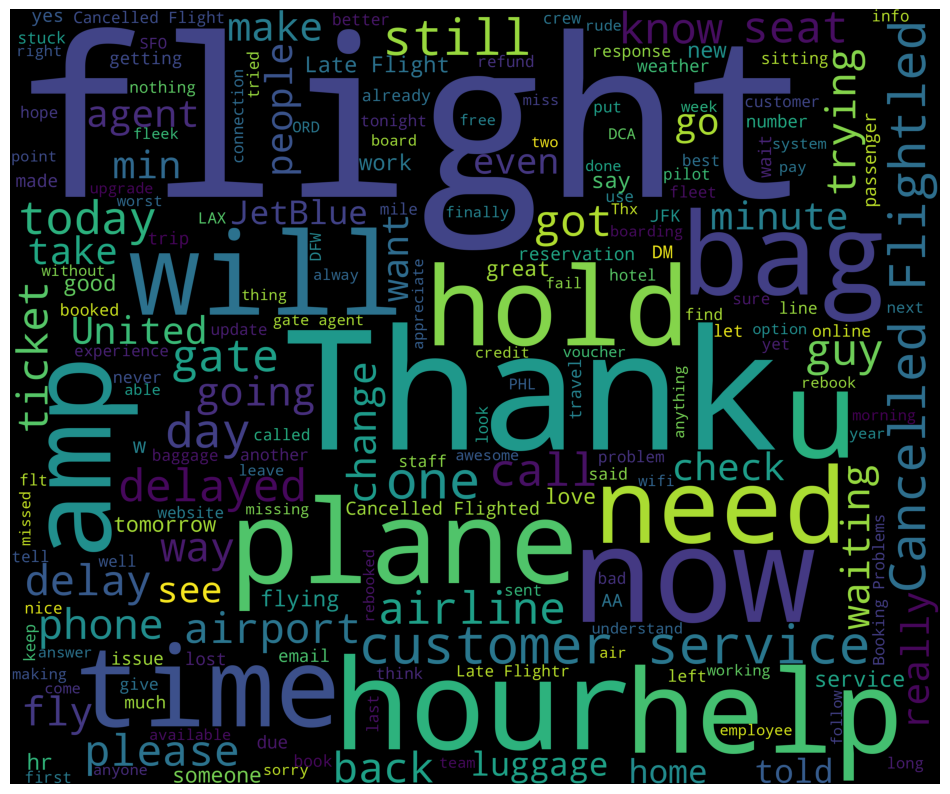

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* "Flight", "Thank" are the most eye-catching words in this WordCloud.

## Data Preparation for Modeling

- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

In [ ]:
# Dropping unnecessary columns
cdata = cdata[['text', 'airline_sentiment']]

In [ ]:
# The first 5 rows of the newly created subset
cdata.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
# Shape of the new subset
cdata.shape

(14640, 2)

* The dataset now contains 14 640 rows with 2 columns.

In [ ]:
# Displaying all the unique values in the airline sentiment column
cdata['airline_sentiment'].nunique()

3

* There are 3 unique values within the dataset.

In [ ]:
# Displaying values in the airline sentiment column
cdata['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

* The airline_sentiment column contains the three values: neutral, positive and negative.

In [ ]:
# Removing the HTML tags
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

  cdata['text'] = cdata['text'].apply(lambda x: strip_html(x))
  cdata.head()

In [ ]:
# Replacing contractions in string
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

cdata['text'] = cdata['text'].apply(lambda x: replace_contractions(x))
cdata.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


* Removed all contractions from text column.

In [ ]:
# Removing numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

cdata['text'] = cdata['text'].apply(lambda x: remove_numbers(x))
cdata.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


* Removing all numbers in the text column.

In [ ]:
# Applying tokenization
cdata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Length: 14640, dtype: object

In [ ]:
# Applying tokenization on text column
cdata['text'] = cdata.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
cdata.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


In [ ]:
# Applying lowercase and removing stopwords and punctuation
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [ ]:
# All preprocessing steps in a single function
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

cdata['text'] = cdata.apply(lambda row: normalize(row['text']), axis=1)
cdata.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## Model Building

### Using countvectorizer

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


In [ ]:
# Vectorization (Converting text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features = 5000)
data_features = Count_vec.fit_transform(cdata['text'])

data_features = data_features.toarray()

In [ ]:
data_features.shape

(14640, 5000)

* There are 14640 rows and 5000 columns in the new dataset.

In [ ]:
# Storing the indeoendent and dependent variables
X = data_features
y = cdata.airline_sentiment

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Random Forest Model for the classification of reviews
random_forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4)
random_forest = random_forest.fit(X_train, y_train)
print(random_forest)
print(np.mean(cross_val_score(random_forest, X, y, cv = 10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7209699453551911


* Random Forest has an accuracy of 72% in predicting a postitive, negative or neutral sentiment for a tweet.

In [ ]:
# Finding optimal numbers of base learners using k-fold CV
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

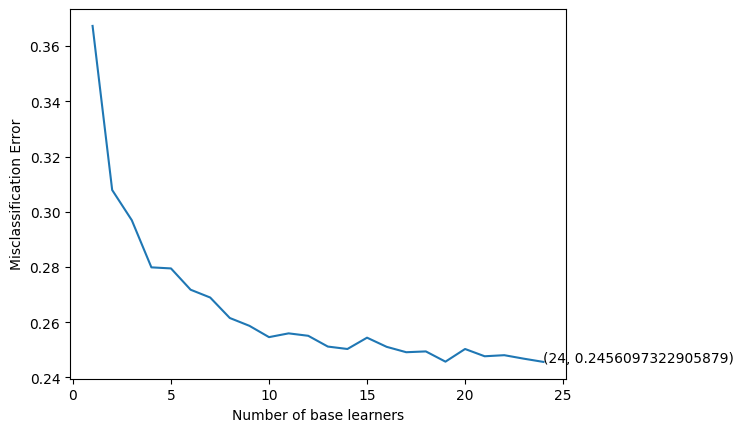

In [ ]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = 10)                     # Initialize the Random Forest classifier with optimal learners
clf.fit(X_train, y_train)                                               # Fit the classifer on X_train and y_train
clf.score(X_test, y_test)                                             # Find the score on X_train and y_train

0.7543260473588342

* The random forest model has an accuracy of 75% on the test data.

In [ ]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)

In [ ]:
from nltk.metrics.confusionmatrix import ConfusionMatrix
# Confusion matirx

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

[[2507  243   64]
 [ 404  416   64]
 [ 196  108  390]]


<Axes: >

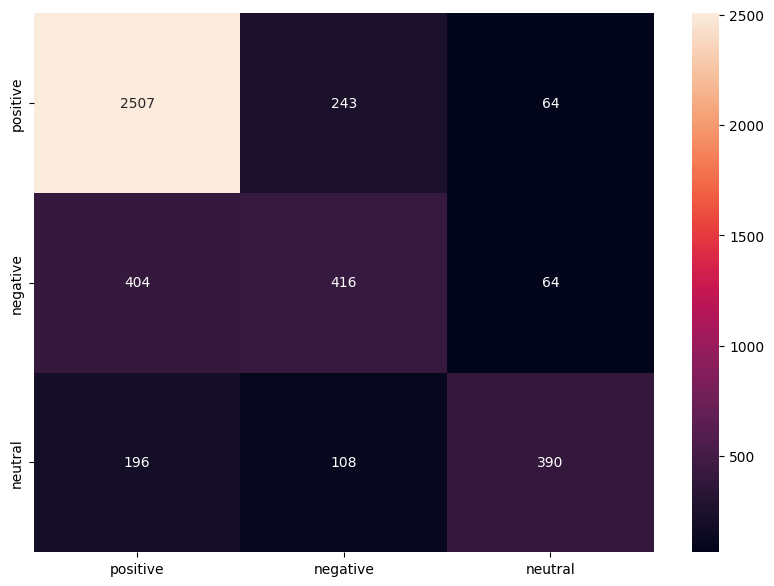

In [ ]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
# Wordcloud of top 40 features
all_features = Count_vec.get_feature_names_out()               # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank,not,jetblue,great,flight,usairways,delay,http,southwestair,hold,unite,love,wait,get,virginamerica,bag,amaze,awesome,hours,service,dm,cancel,americanair,please,call,follow,miss,fly,still,say,time,try,plane,hour,late,customer,help,flightled,worst,know,
 
 


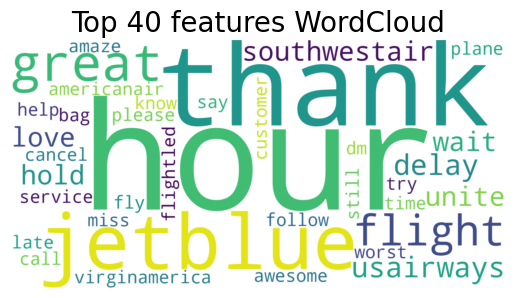

In [ ]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 2000)                          # Complete the code to initialize the TF-IDF vector function with max_features = 5000.
data_features = tfidf_vect.fit_transform(cdata['text'])                   # Fit the tf idf function on the text column

data_features = data_features.toarray()

In [ ]:
# Shape of the data_features
data_features.shape

(14640, 2000)

In [ ]:
# Storing the dependent and independent variables
X = data_features                                                        # Complete the code to get the independent variable (data_features) stored as X
y = cdata.airline_sentiment

In [ ]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)            # Initialize the Random Forest Classifier

forest = forest.fit(X_train, y_train)                         # Fit the forest variable on X_train and y_train

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))          # Calculate cross validation score

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7101092896174863


* The TF-IDF model has an accuracy of 71% on the test dataset.

In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

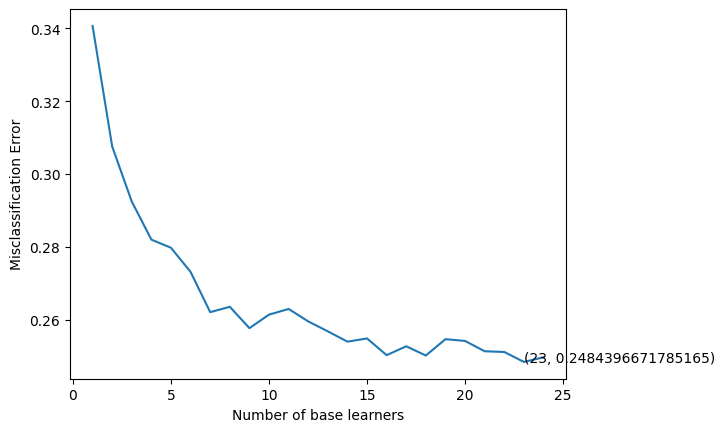

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.770264116575592

TF-IDF model has an accuracy of 77% on the test dataset.

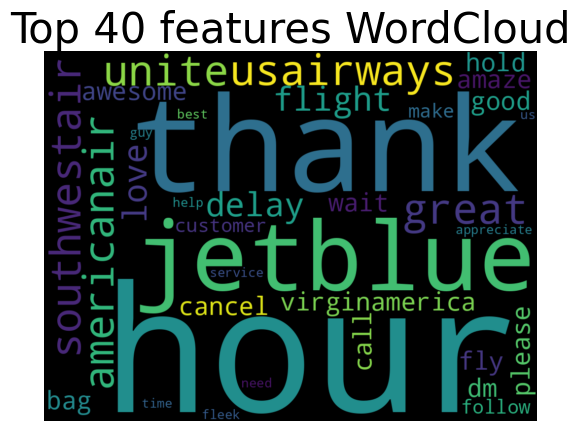

In [ ]:
all_features = tfidf_vect.get_feature_names_out()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

## Summary

---



* This model used a dataset that had consumer reviews in text format and the consumer sentiment classified as neutal, positive and negative.
* The objective was to build a model for text classification.
* Various pre-processing was conducted on the dataset such as removal of numeric digits, contractions, and HTML tags.
* Various word clouds were created to highlight common words used by consumers in their airline tweets.
* Two models were trained using two methods, CountVectorizer and TF-IDF.
* The TF-IDF model has the best accuracy at 77% on the test dataset. This means that it is able to correctly classify tweets in neutral, positive or negative in 77% of cases.
* The model could be improved through the use of a max_feature parameter within the vectorizor.
* Various hyperparameters and pre-processing techniques may improve the model accuracy.  

## Happy Learning!